In [9]:
import pandas as pd
import os
from glob import glob
import numpy as np
from google.colab import drive, files
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Mounting Google Drive
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/Colab Notebooks/intern/'

Mounted at /content/drive


In [ ]:
# Function to load and preprocess the data
def preprocess_data(file_path):
    df = pd.read_csv(file_path)
    # Scaling and EMA
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(df[['t1', 't2']]) 

    scaled_data = scaler.transform(df[['t1', 't2']]) 
    df[['t1_scaled', 't2_scaled']] = scaled_data 

    df = apply_ema(df) 

    lagged_df = create_lagged_features(df, n_lags=5)

    X = lagged_df.dropna().drop(columns=['t1', 't2', 't1_scaled', 't2_scaled'])  
    y = lagged_df[['t1_scaled', 't2_scaled']]  


    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], 1, X.shape[1])

    return X, y, scaler, df

# Function to create EMA
def apply_ema(data, span=10):
    data['t1_ema'] = data['t1'].ewm(span=span, adjust=False).mean()
    data['t2_ema'] = data['t2'].ewm(span=span, adjust=False).mean()
    return data

# Function to create lagged features
def create_lagged_features(data, n_lags=5):
    lagged_data = data.copy()
    for lag in range(1, n_lags + 1):
        lagged_data = pd.concat([lagged_data, data[['t1', 't2']].shift(lag).add_suffix(f'_lag{lag}')], axis=1)
    lagged_data = lagged_data.dropna()  # Drop rows with missing values after lagging
    return lagged_data


# Load the data and preprocess
file_path = '/content/intern_v1_0703.csv'  # Replace with your actual file path
X, y, scaler, df = preprocess_data(file_path)


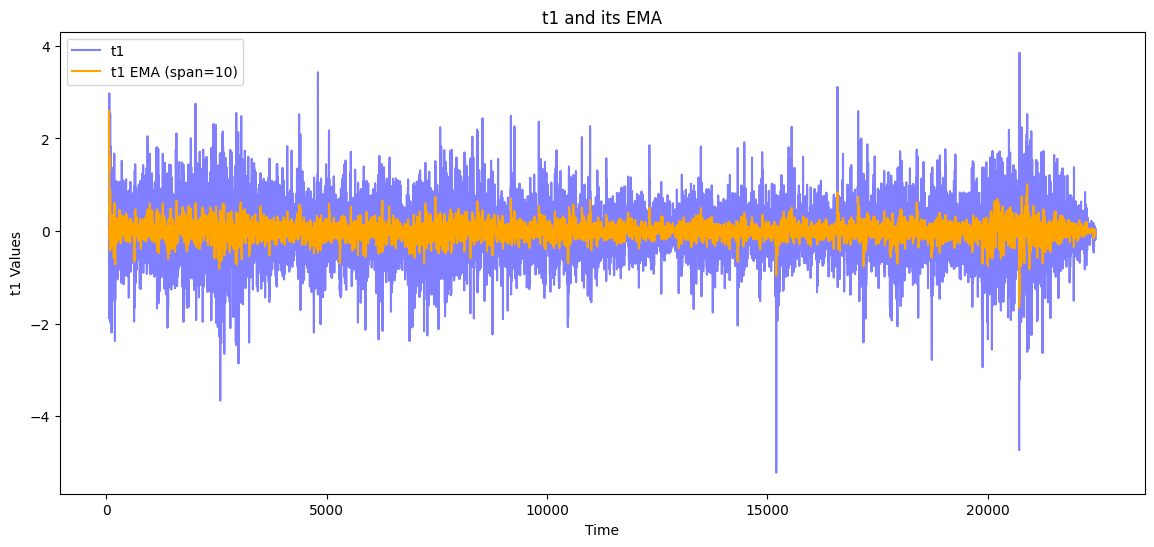

In [17]:
plt.figure(figsize=(14, 6))
plt.plot(df['Time'], df['t2'], label='t2', color='blue', alpha=0.5)
plt.plot(df['Time'], df['t2_ema'], label='t2 EMA (span=10)', color='orange')
plt.title('t2 and its EMA')
plt.xlabel('Time')
plt.ylabel('t2 Values')
plt.legend()
plt.show()


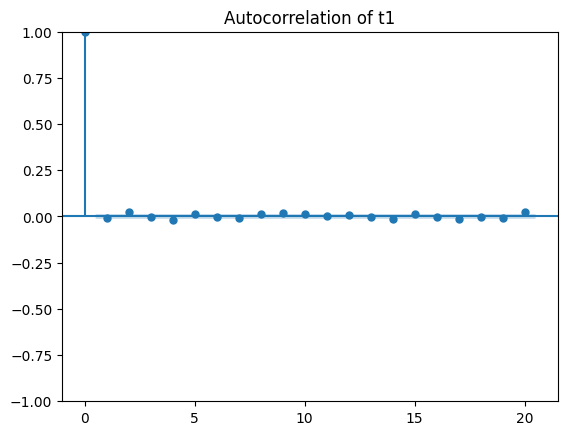

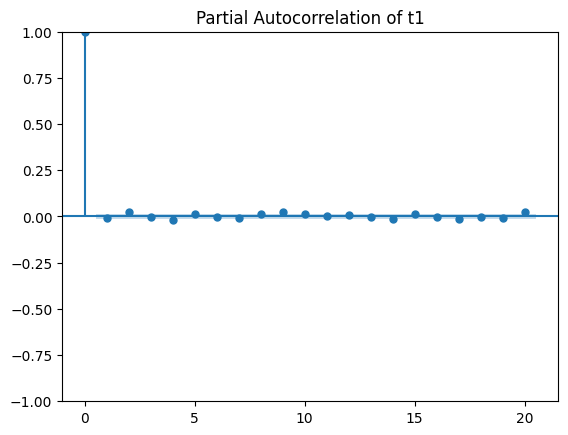

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['t2'], lags=20)
plt.title('Autocorrelation of t2')
plt.show()

plot_pacf(df['t2'], lags=20)
plt.title('Partial Autocorrelation of t2')
plt.show()


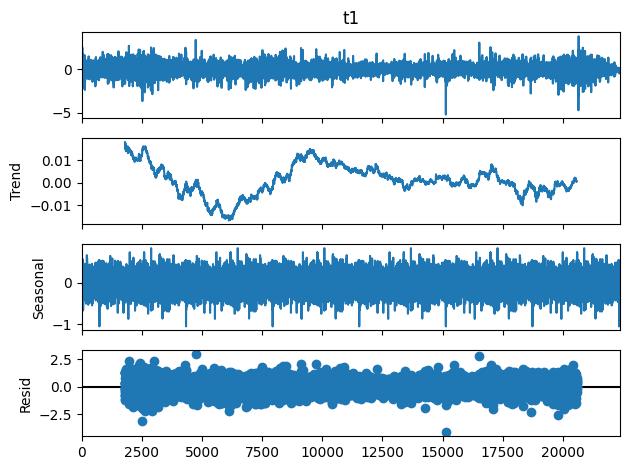

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['t2'], model='additive', period=3600)  # Assuming hourly seasonality
decomposition.plot()
plt.show()


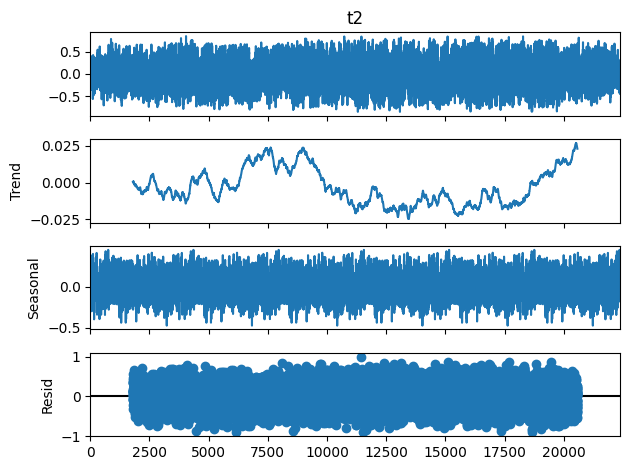

In [20]:
decomposition = seasonal_decompose(df['t2'], model='additive', period=3600)  # Assuming hourly seasonality
decomposition.plot()
plt.show()